<a href="https://colab.research.google.com/github/sdasmaha/Ml_Engineers_445/blob/master/Exercise_4_SubmissionTemplate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
from scipy import stats as sps
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from IPython.display import display, Latex

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
X =  df_train
y =  df_train.T[0]

In [ ]:
Xtest = df_test['ChemA']
ytest = df_test['ChemB']

# 1. Machine Learning for Diagnosis of 'Senioritis'

In [ ]:
df_train = pd.read_csv("/content/gdrive/MyDrive/Colab Notebooks/BAJWA-ML/Notebook 4 dataset/SenioritisTrainingData.csv")
df_test = pd.read_csv("/content/gdrive/MyDrive/Colab Notebooks/BAJWA-ML/Notebook 4 dataset/SenioritisTestData.csv")

In [6]:
def ldaLearn(X,y):
    # Inputs
    # X - a N x d matrix with each row corresponding to a training example
    # y - a N x 1 column vector indicating the labels for each training example
    #
    # Outputs
    # means - A d x k matrix containing learnt means for each of the k classes
    # covmat - A single d x d learnt covariance matrix 
    
    # IMPLEMENT THIS METHOD 
    a = np.unique(y)
    means = np.zeros((len(a), X.shape[1]))
    for i in a:
        x1 = X[np.where(y == i)[0]]
        means[int(i)-1] = x1.mean(axis=0)
    covmat = np.cov(X.T)
    return means, covmat

In [7]:
def ldaTest(means,covmat,Xtest,ytest):
    # Inputs
    # means, covmat - parameters of the LDA model
    # Xtest - a N x d matrix with each row corresponding to a test example
    # ytest - a N x 1 column vector indicating the labels for each test example
    # Outputs
    # acc - A scalar accuracy value
    # ypred - N x 1 column vector indicating the predicted labels

    # IMPLEMENT THIS METHOD
    g = 1 / np.sqrt((2*np.pi**means.shape[1])*det(covmat))
    ll = np.zeros((Xtest.shape[0], means.shape[0]))
    for i in range(Xtest.shape[0]):
        for h in range(means.shape[0]):
            b = Xtest[i, :] - means[int(h) - 1]
            t = (-1/2)*np.dot(np.dot(b.T, inv(covmat)), b)
            ll[i,int(h)-1] = g * np.e**t 
            
    ypred = []
    for row in ll:
        ypred.append(list(row).index(max(list(row)))+1)
    #ypred = np.argmax(ll, axis=1)+1
    
    acc = 0
    for k in range(len(ypred)):
        if ypred[k] == ytest[k]:
            acc += 1
    acc = acc / len(ypred)
    ytest=ytest.flatten()
    return acc, np.array(ypred)


Dont run the down cell

In [ ]:
# Load the sample data                                                                 
if sys.version_info.major == 2:
    X,y,Xtest,ytest = pickle.load(open('sample.pickle','rb'))
else:
    X,y,Xtest,ytest = pickle.load(open('sample.pickle','rb'),encoding = 'latin1')


In [8]:
# LDA
means,covmat = ldaLearn(X,y)
ldaacc,ldares = ldaTest(means,covmat,Xtest,ytest)
print('LDA Accuracy = '+str(ldaacc))

IndexError: ignored

In [14]:
# LDA
means,covmat = ldaLearn(X,y)
ldaacc,ldares = ldaTest(means,covmat,Xtest,ytest)
print('LDA Accuracy = '+str(ldaacc))
# QDA
means,covmats = qdaLearn(X,y)
qdaacc,qdares = qdaTest(means,covmats,Xtest,ytest)
print('QDA Accuracy = '+str(qdaacc))

# Plotting boundaries
x1 = np.linspace(-5,20,100)
x2 = np.linspace(-5,20,100)
xx1,xx2 = np.meshgrid(x1,x2)
xx = np.zeros((x1.shape[0]*x2.shape[0],2))
xx[:,0] = xx1.ravel()
xx[:,1] = xx2.ravel()

fig = plt.figure(figsize=[12,6])
plt.subplot(1, 2, 1)

zacc,zldares = ldaTest(means,covmat,xx,np.zeros((xx.shape[0],1)))
plt.contourf(x1,x2,zldares.reshape((x1.shape[0],x2.shape[0])),alpha=0.3)
plt.scatter(Xtest[:,0],Xtest[:,1],c=ytest[:,0])
plt.title('LDA')

plt.subplot(1, 2, 2)

zacc,zqdares = qdaTest(means,covmats,xx,np.zeros((xx.shape[0],1)))
plt.contourf(x1,x2,zqdares.reshape((x1.shape[0],x2.shape[0])),alpha=0.3)
plt.scatter(Xtest[:,0],Xtest[:,1],c=ytest[:,0])
plt.title('QDA')

plt.show()

IndexError: ignored

loading the dataset.

In [ ]:
chemA = df_train['ChemA']
chemB = df_train['ChemB']

In [ ]:
mean_chemA = np.mean(df_train['ChemA'])
mean_chemB = np.mean(df_train['ChemB'])

In [ ]:
scatter_chemA = np.dot((chemA-mean_chemA),(chemA-mean_chemA).T)
scatter_chemB = np.dot((chemB-mean_chemB),(chemB-mean_chemB).T)

In [ ]:
ScatWithin = scatter_chemA+scatter_chemB

## Problem 1.1

In [ ]:
df_train.head(5)

,ClassLabel,ChemA,ChemB
0,No Senioritis,0.761978,1.297784
1,No Senioritis,-4.201767,2.075620
2,No Senioritis,-2.058259,1.742863
3,No Senioritis,-3.398326,0.842963
4,No Senioritis,-4.381524,0.264941


In [ ]:
df_train.dtypes

ClassLabel     object
ChemA         float64
ChemB         float64
dtype: object

In [ ]:
df_test.head(5)

,ClassLabel,ChemA,ChemB
0,No Senioritis,-2.741254,1.306506
1,No Senioritis,0.740437,0.777617
2,No Senioritis,-2.194054,0.248409
3,No Senioritis,0.297858,2.210354
4,No Senioritis,-3.669042,1.265693


In [ ]:
x1 = df_train['ClassLabel']== 'No Senioritis'
y1 = df_train['ClassLabel']== 'Senioritis'

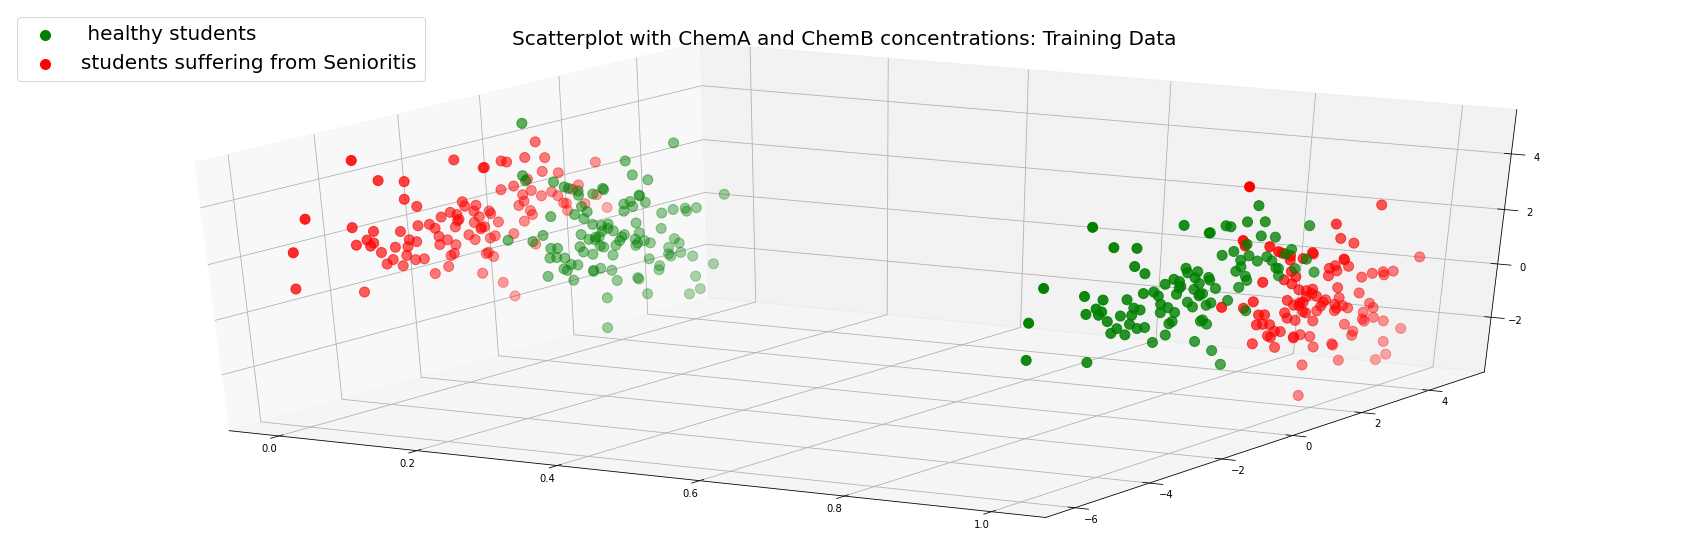

In [ ]:
fig = plt.figure(figsize=(30,10))
ax = fig.add_subplot(111, projection='3d')
#if (df_train['ClassLabel'] == 'Senioritis')
#ax.scatter(df['ChemA'],df['ChemB'], color = 'red', label = 'Students suffering from Senioritis')
ax.scatter3D(x1,df_train['ChemA'],df_train['ChemB'], color = 'green', s =100, label=' healthy students')
ax.scatter3D(y1,df_train['ChemA'],df_train['ChemB'], color = 'red', s =100, label = 'students suffering from Senioritis'  )
plt.title('Scatterplot with ChemA and ChemB concentrations: Training Data',fontsize = 20)
plt.legend(loc = 'upper left', fontsize = 20)
#plt.title('Original data samples, lying in a two-dimensional subspace spanned by the two columns of the matrix A')
plt.show()

In [ ]:
x = df_test['ClassLabel']== 'No Senioritis'
y = df_test['ClassLabel']== 'Senioritis'

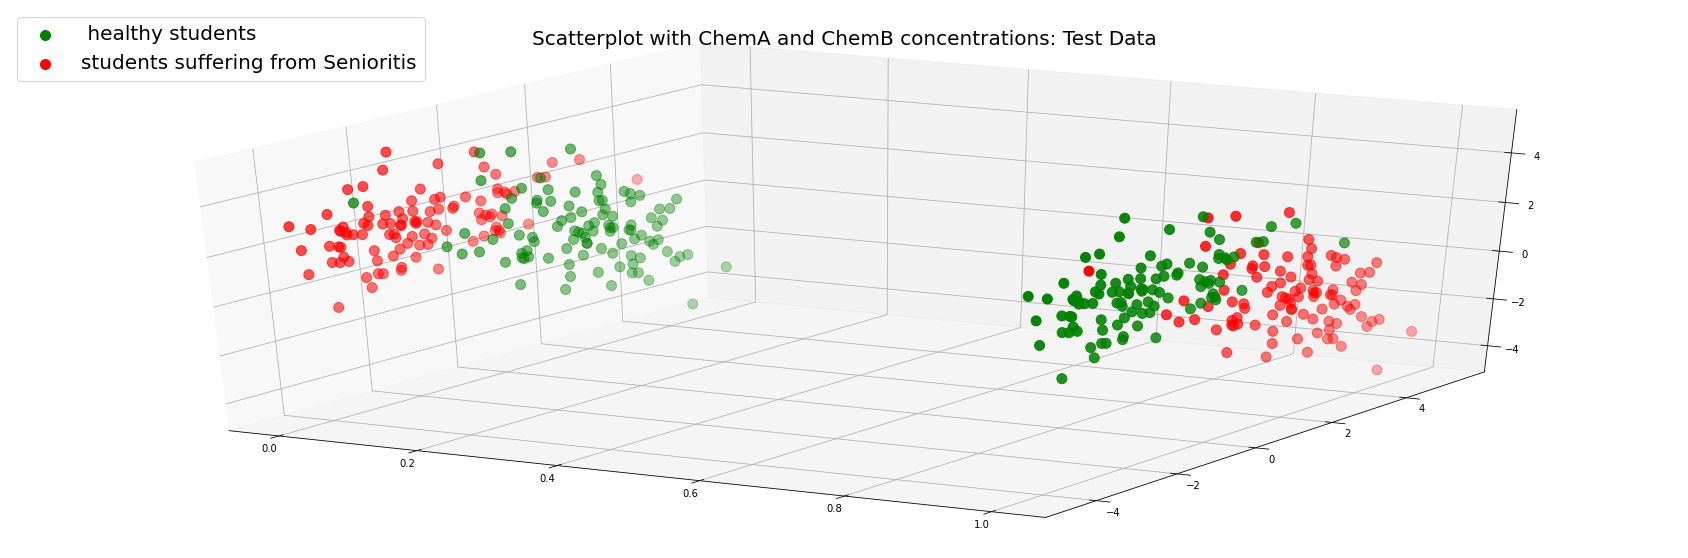

In [ ]:
fig = plt.figure(figsize=(30,10))
ax = fig.add_subplot(111, projection='3d')
#if (df_train['ClassLabel'] == 'Senioritis')
#ax.scatter(df['ChemA'],df['ChemB'], color = 'red', label = 'Students suffering from Senioritis')
ax.scatter3D(x,df_test['ChemA'],df_test['ChemB'], color = 'green', s =100, label=' healthy students')
ax.scatter3D(y,df_test['ChemA'],df_test['ChemB'], color = 'red', s =100, label = 'students suffering from Senioritis'  )
plt.title('Scatterplot with ChemA and ChemB concentrations: Test Data',fontsize = 20)
plt.legend(loc = 'upper left', fontsize = 20)
#plt.title('Original data samples, lying in a two-dimensional subspace spanned by the two columns of the matrix A')
plt.show()

## Problem 1.2

### (a)

reference: https://github.com/python-engineer/MLfromscratch/tree/master/mlfromscratch

In [ ]:
class LDA:

    def __init__(self, n_components):
        self.n_components = n_components
        self.linear_discriminants = None

    def fit(self, X, y):
        n_features = X.shape[1]
        class_labels = np.unique(y)

        # Within class scatter matrix:
        # SW = sum((X_c - mean_X_c)^2 )

        # Between class scatter:
        # SB = sum( n_c * (mean_X_c - mean_overall)^2 )

        mean_overall = np.mean(X, axis=0)
        SW = np.zeros((n_features, n_features))
        SB = np.zeros((n_features, n_features))
        for c in class_labels:
            X_c = X[y == c]
            mean_c = np.mean(X_c, axis=0)
            # (4, n_c) * (n_c, 4) = (4,4) -> transpose
            SW += (X_c - mean_c).T.dot((X_c - mean_c))

            # (4, 1) * (1, 4) = (4,4) -> reshape
            n_c = X_c.shape[0]
            mean_diff = (mean_c - mean_overall).reshape(n_features, 1)
            SB += n_c * (mean_diff).dot(mean_diff.T)

        # Determine SW^-1 * SB
        A = np.linalg.inv(SW).dot(SB)
        # Get eigenvalues and eigenvectors of SW^-1 * SB
        eigenvalues, eigenvectors = np.linalg.eig(A)
        # -> eigenvector v = [:,i] column vector, transpose for easier calculations
        # sort eigenvalues high to low
        eigenvectors = eigenvectors.T
        idxs = np.argsort(abs(eigenvalues))[::-1]
        eigenvalues = eigenvalues[idxs]
        eigenvectors = eigenvectors[idxs]
        # store first n eigenvectors
        self.linear_discriminants = eigenvectors[0:self.n_components]

    def transform(self, X):
        # project data
        return np.dot(X, self.linear_discriminants.T)

In [ ]:
lda = LDA(2)
lda.fit(X, y)
X_projected = lda.transform(X)

print('Shape of X:', X.shape)
print('Shape of transformed X:', X_projected.shape)

x1 = X_projected[:, 0]
x2 = X_projected[:, 1]

plt.scatter(x1, x2,
        c=y, edgecolor='none', alpha=0.8,
        cmap=plt.cm.get_cmap('viridis', 3))

plt.xlabel('Linear Discriminant 1')
plt.ylabel('Linear Discriminant 2')
plt.colorbar()
plt.show()

for reference https://www.python-course.eu/linear_discriminant_analysis.


### (b)

for reference: https://github.com/alinarw/LDA_QDA/blob/master/script.py

In [ ]:
import numpy as np
from numpy.linalg import det, inv
import matplotlib.pyplot as plt
import pickle
import sys

def ldaLearn(X,y):
    # Inputs
    # X - a N x d matrix with each row corresponding to a training example
    # y - a N x 1 column vector indicating the labels for each training example
    #
    # Outputs
    # means - A d x k matrix containing learnt means for each of the k classes
    # covmat - A single d x d learnt covariance matrix 
    
    # IMPLEMENT THIS METHOD 
    a = np.unique(y)
    means = np.zeros((len(a), X.shape[1]))
    for i in a:
        x1 = X[np.where(y == i)[0]]
        means[int(i)-1] = x1.mean(axis=0)
    covmat = np.cov(X.T)
    return means, covmat

def qdaLearn(X,y):
    # Inputs
    # X - a N x d matrix with each row corresponding to a training example
    # y - a N x 1 column vector indicating the labels for each training example
    #
    # Outputs
    # means - A d x k matrix containing learnt means for each of the k classes
    # covmats - A list of k d x d learnt covariance matrices for each of the k classes
    
    # IMPLEMENT THIS METHOD
    covmats = []
    labels = np.unique(y)
    means = np.zeros([labels.shape[0],X.shape[1]])

    for i in range(labels.shape[0]):
        m = np.mean(X[np.where(y == labels[i])[0],],axis=0)
        means[i,] = m
        covmats.append(np.cov(np.transpose(X[np.where(y == labels[i])[0],])))
    return means, covmats

def ldaTest(means,covmat,Xtest,ytest):
    # Inputs
    # means, covmat - parameters of the LDA model
    # Xtest - a N x d matrix with each row corresponding to a test example
    # ytest - a N x 1 column vector indicating the labels for each test example
    # Outputs
    # acc - A scalar accuracy value
    # ypred - N x 1 column vector indicating the predicted labels

    # IMPLEMENT THIS METHOD
    g = 1 / np.sqrt((2*np.pi**means.shape[1])*det(covmat))
    ll = np.zeros((Xtest.shape[0], means.shape[0]))
    for i in range(Xtest.shape[0]):
        for h in range(means.shape[0]):
            b = Xtest[i, :] - means[int(h) - 1]
            t = (-1/2)*np.dot(np.dot(b.T, inv(covmat)), b)
            ll[i,int(h)-1] = g * np.e**t 
            
    ypred = []
    for row in ll:
        ypred.append(list(row).index(max(list(row)))+1)
    #ypred = np.argmax(ll, axis=1)+1
    
    acc = 0
    for k in range(len(ypred)):
        if ypred[k] == ytest[k]:
            acc += 1
    acc = acc / len(ypred)
    ytest=ytest.flatten()
    return acc, np.array(ypred)

def qdaTest(means,covmats,Xtest,ytest):
    # Inputs
    # means, covmats - parameters of the QDA model
    # Xtest - a N x d matrix with each row corresponding to a test example
    # ytest - a N x 1 column vector indicating the labels for each test example
    # Outputs
    # acc - A scalar accuracy value
    # ypred - N x 1 column vector indicating the predicted labels

    # IMPLEMENT THIS METHOD
    a = np.unique(ytest)
    ll = np.zeros((Xtest.shape[0], means.shape[0]))
    for i in range(Xtest.shape[0]):
        for h in range(means.shape[0]):
            index = int(h)-1
            b = Xtest[i, :] - means[index]
            t = (-1/2)*np.dot(np.dot(b.T, inv(covmats[index])), b)
            g = 1 / np.sqrt((2*np.pi**means.shape[1])*det(covmats[index]))
            ll[i,index] = g * np.e**t 
            
    ypred = []
    for row in ll:
        ypred.append(list(row).index(max(list(row)))+1)
    #ypred = np.argmax(ll, axis=1)+1
    
    acc = 0
    for k in range(len(ypred)):
        if ypred[k] == ytest[k]:
            acc += 1
    acc = acc / len(ypred)
    ytest=ytest.flatten()
    return acc, np.array(ypred)

# Load the sample data                                                                 
if sys.version_info.major == 2:
    X,y,Xtest,ytest = pickle.load(open('sample.pickle','rb'))
else:
    X,y,Xtest,ytest = pickle.load(open('sample.pickle','rb'),encoding = 'latin1')

# LDA
means,covmat = ldaLearn(X,y)
ldaacc,ldares = ldaTest(means,covmat,Xtest,ytest)
print('LDA Accuracy = '+str(ldaacc))
# QDA
means,covmats = qdaLearn(X,y)
qdaacc,qdares = qdaTest(means,covmats,Xtest,ytest)
print('QDA Accuracy = '+str(qdaacc))

# Plotting boundaries
x1 = np.linspace(-5,20,100)
x2 = np.linspace(-5,20,100)
xx1,xx2 = np.meshgrid(x1,x2)
xx = np.zeros((x1.shape[0]*x2.shape[0],2))
xx[:,0] = xx1.ravel()
xx[:,1] = xx2.ravel()

fig = plt.figure(figsize=[12,6])
plt.subplot(1, 2, 1)

zacc,zldares = ldaTest(means,covmat,xx,np.zeros((xx.shape[0],1)))
plt.contourf(x1,x2,zldares.reshape((x1.shape[0],x2.shape[0])),alpha=0.3)
plt.scatter(Xtest[:,0],Xtest[:,1],c=ytest[:,0])
plt.title('LDA')

plt.subplot(1, 2, 2)

zacc,zqdares = qdaTest(means,covmats,xx,np.zeros((xx.shape[0],1)))
plt.contourf(x1,x2,zqdares.reshape((x1.shape[0],x2.shape[0])),alpha=0.3)
plt.scatter(Xtest[:,0],Xtest[:,1],c=ytest[:,0])
plt.title('QDA')

plt.show()

### (c)

In [ ]:
import numpy as np

class NaiveBayes:

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self._classes = np.unique(y)
        n_classes = len(self._classes)

        # calculate mean, var, and prior for each class
        self._mean = np.zeros((n_classes, n_features), dtype=np.float64)
        self._var = np.zeros((n_classes, n_features), dtype=np.float64)
        self._priors =  np.zeros(n_classes, dtype=np.float64)

        for idx, c in enumerate(self._classes):
            X_c = X[y==c]
            self._mean[idx, :] = X_c.mean(axis=0)
            self._var[idx, :] = X_c.var(axis=0)
            self._priors[idx] = X_c.shape[0] / float(n_samples)

    def predict(self, X):
        y_pred = [self._predict(x) for x in X]
        return np.array(y_pred)

    def _predict(self, x):
        posteriors = []

        # calculate posterior probability for each class
        for idx, c in enumerate(self._classes):
            prior = np.log(self._priors[idx])
            posterior = np.sum(np.log(self._pdf(idx, x)))
            posterior = prior + posterior
            posteriors.append(posterior)
            
        # return class with highest posterior probability
        return self._classes[np.argmax(posteriors)]
            

    def _pdf(self, class_idx, x):
        mean = self._mean[class_idx]
        var = self._var[class_idx]
        numerator = np.exp(- (x-mean)**2 / (2 * var))
        denominator = np.sqrt(2 * np.pi * var)
        return numerator / denominator

### (d)

In [ ]:
import numpy as np
from collections import Counter


def euclidean_distance(x1, x2):
        return np.sqrt(np.sum((x1 - x2)**2))


class KNN:

    def __init__(self, k=3):
        self.k = k

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X):
        y_pred = [self._predict(x) for x in X]
        return np.array(y_pred)

    def _predict(self, x):
        # Compute distances between x and all examples in the training set
        distances = [euclidean_distance(x, x_train) for x_train in self.X_train]
        # Sort by distance and return indices of the first k neighbors
        k_idx = np.argsort(distances)[:self.k]
        # Extract the labels of the k nearest neighbor training samples
        k_neighbor_labels = [self.y_train[i] for i in k_idx]  
        # return the most common class label
        most_common = Counter(k_neighbor_labels).most_common(1)
        return most_common[0][0]

## Problem 1.3

### (a)

### (b)

### (c)

### (d)

### (e)

## Problem 1.4

Justify your answer for 1.4 here

## Problem 1.5

### (a)

### (b)

### (c)

### (d)

### (e)

## Problem 1.6


### (a)

### (b)

Justify you answer to 1.6b here